############################################################################################
################## -- Estadística para Ciencia de Datos --##################################
############################################################################################

############################ PCA para Segmentación ########################################

Autores : José Cárdenas - André Chávez 

In [1]:
### Librerias necesarias para el procesamiento
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats.stats import pearsonr  
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist


In [ ]:
###### Vamos a generar una segmentación de países, en base a indicadores del milenio.

La data de los diferentes paises del mundo tiene como variables los siguientes indicadores.

In [12]:
data = pd.read_csv('C:/Users/Andre Chavez/Desktop/Data/DataPais.csv')
data.head(2)

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.9,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.8,85.0
1,Albania,Europe,2.6,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN


In [13]:
# Visualizamos el tipo de data
type(data)

pandas.core.frame.DataFrame

In [14]:
# Podemos también ver las columnas que comprenden nuestro data.frame
data.columns

Index(['country', 'region', 'tfr', 'contraception', 'educationMale',
       'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita', 'economicActivityMale', 'economicActivityFemale',
       'illiteracyMale', 'illiteracyFemale'],
      dtype='object')

In [15]:
print('Estructura de los datos')
[(col, type(data[col][0])) for col in data.columns] 

Estructura de los datos


[('country', str),
 ('region', str),
 ('tfr', numpy.float64),
 ('contraception', numpy.float64),
 ('educationMale', numpy.float64),
 ('educationFemale', numpy.float64),
 ('lifeMale', numpy.float64),
 ('lifeFemale', numpy.float64),
 ('infantMortality', numpy.float64),
 ('GDPperCapita', numpy.float64),
 ('economicActivityMale', numpy.float64),
 ('economicActivityFemale', numpy.float64),
 ('illiteracyMale', numpy.float64),
 ('illiteracyFemale', numpy.float64)]

In [16]:
# Dimensión de la información
data.shape

(207, 14)

In [17]:
# Número de registros por variable
data.count(0)

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

In [18]:
# Podemos ver el poblamiento de las variables
print('% de poblamiento de las variables')
data.count(0)/data.shape[0] * 100

% de poblamiento de las variables


country                   100.000000
region                    100.000000
tfr                        95.169082
contraception              69.565217
educationMale              36.714976
educationFemale            36.714976
lifeMale                   94.685990
lifeFemale                 94.685990
infantMortality            97.101449
GDPperCapita               95.169082
economicActivityMale       79.710145
economicActivityFemale     79.710145
illiteracyMale             77.294686
illiteracyFemale           77.294686
dtype: float64

In [19]:
# Por ésta vez nos vamos a quedar solamente con los registros completos.
df = data[['tfr','contraception','lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita','economicActivityMale','economicActivityFemale','illiteracyMale','illiteracyFemale']]
df = df.dropna(how='any')

In [10]:
# Nos quedamos solamente con las variables con informacion completa.
df.shape

(97, 10)

In [20]:
# Comprobamos la información.
df[:5]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9


In [22]:
# Analizamos la relación existente entre las variables
matrix_correlations_paises=df.corr(method='spearman') # ‘pearson’, ‘kendall’, ‘spearman’
matrix_correlations_paises

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.000000,-0.670682,-0.618195,-0.800646,0.798705,-0.512281,0.382837,-0.234847,0.705913,0.703835
contraception,-0.670682,1.000000,0.656672,0.647482,-0.675453,0.558244,-0.149596,0.029713,-0.441955,-0.444177
lifeMale,-0.618195,0.656672,1.000000,0.911515,-0.827150,0.679044,-0.132288,-0.197044,-0.416360,-0.451126
lifeFemale,-0.800646,0.647482,0.911515,1.000000,-0.923260,0.699588,-0.268348,-0.013825,-0.601069,-0.643678
infantMortality,0.798705,-0.675453,-0.827150,-0.923260,1.000000,-0.692727,0.337702,-0.024087,0.654957,0.682221
GDPperCapita,-0.512281,0.558244,0.679044,0.699588,-0.692727,1.000000,-0.223649,-0.251548,-0.317938,-0.336557
economicActivityMale,0.382837,-0.149596,-0.132288,-0.268348,0.337702,-0.223649,1.000000,0.066141,0.466505,0.419720
economicActivityFemale,-0.234847,0.029713,-0.197044,-0.013825,-0.024087,-0.251548,0.066141,1.000000,-0.315883,-0.327136
illiteracyMale,0.705913,-0.441955,-0.416360,-0.601069,0.654957,-0.317938,0.466505,-0.315883,1.000000,0.967906
illiteracyFemale,0.703835,-0.444177,-0.451126,-0.643678,0.682221,-0.336557,0.419720,-0.327136,0.967906,1.000000


In [23]:
### Exportamos la información a un csv para poder visualizar las relaciones.
#matrix_correlations_paises.to_csv('C:/Users/Andre Chavez/Desktop/DictadodeCursos/EstadisticaparaCienciadeDatos/matrix_correlations_paises.csv')

### Reducir el número de dimensiones de los datos con ACP

In [31]:
# Nos quedamos sólo con los valores del df
pc_toarray = df.values

In [41]:
# Escalamos los valores para poder aplicar el ACP
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pc_toarray = scale(pc_toarray)

In [42]:
# Realizando el análisis de Componentes Principales, funcion PCA
hpc = PCA(n_components=10).fit(pc_toarray)
hpc

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
# Porcentaje de la Varianza Explicada por cada componente
hpc.explained_variance_ratio_


array([0.58858332, 0.12418127, 0.10245655, 0.07403812, 0.04929412,
       0.03151779, 0.014864  , 0.01084343, 0.00283283, 0.00138858])

In [44]:
# Porcentaje de la Varianza Explicada Acumulada
var1=np.cumsum(np.round(hpc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 58.86,  71.28,  81.53,  88.93,  93.86,  97.01,  98.5 ,  99.58,
        99.86, 100.  ])

In [45]:
# Número de Componentes Principales
hpc.n_components_

10

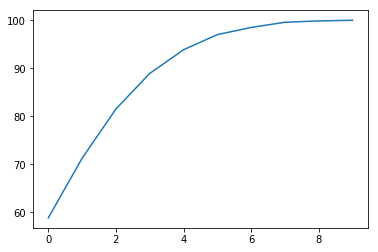

In [46]:
plt.plot(var1)

In [48]:
# Analizamos el número de componentes 
hpc = PCA(n_components=4).fit_transform(pc_toarray)

##### Podemos seguir estudiando : KernelPCA, SparsePCA, TruncatedSVD, IncrementalPCA

In [49]:
### Para determinar el número idóneo de clusters

Nos da una idea de la cantidad de clusters necesarios para segmentar nuestros datos.

In [50]:
# Determinar el valor de k (Número de Clusters)
k_range = range(1,20)

# Ajustar el algoritmo de K-Means para cada valor de k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]


In [51]:
# Extraer los centroides o centros de cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [52]:
# Calcular la distancia euclídea de cada punto a cada uno de los centros de cluster.
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
k_euclid[1]

array([[3.02515128, 3.74791827],
       [2.12681408, 5.21790853],
       [2.27015489, 6.05596515],
       [2.00481163, 4.94365404],
       [4.38992377, 1.96232163],
       [1.56285758, 5.96603329],
       [1.49638672, 5.32336115],
       [1.38020127, 4.1838288 ],
       [5.76599352, 1.87438851],
       [2.40422629, 2.78642188],
       [3.68438258, 1.47727388],
       [1.37893369, 4.35451379],
       [7.68924101, 3.59183261],
       [7.42487883, 3.75142248],
       [5.43157019, 2.12982669],
       [0.89143185, 5.07391314],
       [2.25606312, 5.09689001],
       [0.79938874, 4.9001453 ],
       [0.9698154 , 4.49908722],
       [1.62190867, 5.72990232],
       [1.54918135, 6.00978551],
       [1.22546936, 4.3199308 ],
       [0.87617064, 4.15128733],
       [2.96551921, 2.78215983],
       [1.42282213, 3.52182138],
       [1.48839683, 5.70387593],
       [6.75523253, 2.2960168 ],
       [1.61106875, 4.71165339],
       [6.42118393, 2.3051683 ],
       [1.28295305, 4.85421083],
       [3.

In [53]:
dist = [np.min(ke,axis=1) for ke in k_euclid]
dist[1]

array([3.02515128, 2.12681408, 2.27015489, 2.00481163, 1.96232163,
       1.56285758, 1.49638672, 1.38020127, 1.87438851, 2.40422629,
       1.47727388, 1.37893369, 3.59183261, 3.75142248, 2.12982669,
       0.89143185, 2.25606312, 0.79938874, 0.9698154 , 1.62190867,
       1.54918135, 1.22546936, 0.87617064, 2.78215983, 1.42282213,
       1.48839683, 2.2960168 , 1.61106875, 2.3051683 , 1.28295305,
       2.79982113, 2.49066293, 0.39911884, 2.34260027, 3.97856391,
       2.30836932, 1.78344805, 1.70364422, 2.88003193, 2.85831478,
       1.47681939, 0.79146458, 2.5561158 , 1.54035449, 1.60470776,
       2.44014267, 1.64482014, 1.54508206, 1.64225083, 3.37501645,
       0.50567736, 2.00581089, 0.9942475 , 1.13433661, 1.65132242,
       2.68591063, 2.43261034, 2.4243212 , 0.79328089, 2.64543461,
       2.48877559, 0.77631659, 2.38254591, 1.04973489, 1.73349851,
       3.42312797, 1.2444976 , 1.99315081, 2.55601921, 2.97670122,
       2.35905562, 1.34037821, 1.93865125, 1.25284608, 1.63984

In [54]:
hpc

array([[ 0.32358057,  2.25063269,  0.62161949, -0.79845776],
       [-1.55687058, -1.04107824,  1.83553096,  0.11374063],
       [-2.51605611, -0.76838707, -1.53678834,  0.93469974],
       [-1.30901434,  1.3048037 , -1.47195555, -0.34722548],
       [ 2.6921884 , -0.10576982, -1.68464323, -0.3780492 ],
       [-2.69026797, -0.67930794, -0.24490005,  0.41662681],
       [-1.81745162, -1.44822807,  0.07688711, -0.46309752],
       [-0.76908909,  1.00459886, -0.21891918, -0.70637815],
       [ 4.22832876, -0.15657465, -1.42472951, -0.05562593],
       [ 0.74051818, -1.01540218,  0.60311004,  0.09570697],
       [ 2.1174244 , -0.3753875 ,  0.78916673,  0.70741163],
       [-0.85419482, -0.50955479, -1.21304202, -0.34655825],
       [ 6.02418873, -1.11475333, -1.67119533,  0.74673303],
       [ 5.51210145, -2.10640044, -1.74782407,  0.74718066],
       [ 3.74573886, -1.68117357, -0.8319057 ,  0.26054203],
       [-1.8206533 ,  0.53130251,  0.42326161, -0.23790696],
       [-1.17136226, -1.

In [55]:
centroids[1]

array([[-1.36658959, -0.0706634 , -0.03425788, -0.10833135],
       [ 3.20441697,  0.16569349,  0.08032883,  0.25401833]])

In [56]:
np.sqrt((0.32358057-(-1.29901664))**2+(2.25063269-(-0.0224291))**2+(0.62161949-(-0.01931832))**2+(-0.79845776-(-0.11335694))**2)

2.9461493541417854

In [57]:
k_euclid[1]

array([[3.02515128, 3.74791827],
       [2.12681408, 5.21790853],
       [2.27015489, 6.05596515],
       [2.00481163, 4.94365404],
       [4.38992377, 1.96232163],
       [1.56285758, 5.96603329],
       [1.49638672, 5.32336115],
       [1.38020127, 4.1838288 ],
       [5.76599352, 1.87438851],
       [2.40422629, 2.78642188],
       [3.68438258, 1.47727388],
       [1.37893369, 4.35451379],
       [7.68924101, 3.59183261],
       [7.42487883, 3.75142248],
       [5.43157019, 2.12982669],
       [0.89143185, 5.07391314],
       [2.25606312, 5.09689001],
       [0.79938874, 4.9001453 ],
       [0.9698154 , 4.49908722],
       [1.62190867, 5.72990232],
       [1.54918135, 6.00978551],
       [1.22546936, 4.3199308 ],
       [0.87617064, 4.15128733],
       [2.96551921, 2.78215983],
       [1.42282213, 3.52182138],
       [1.48839683, 5.70387593],
       [6.75523253, 2.2960168 ],
       [1.61106875, 4.71165339],
       [6.42118393, 2.3051683 ],
       [1.28295305, 4.85421083],
       [3.

Calculamos la suma de los cuadrados de la distancia

In [58]:
avgWithinSumSquare = [sum(d)/hpc.shape[0] for d in dist]
avgWithinSumSquare

[2.7018192051191505,
 1.9460522874676087,
 1.7476042275708583,
 1.5770564603604824,
 1.4289334949950323,
 1.362303691341122,
 1.264117166663092,
 1.2259331085179737,
 1.1465198988091503,
 1.1066392539773509,
 1.0544024119352597,
 1.0332484972011022,
 0.9952604198763075,
 0.9386496238113015,
 0.9207985990117927,
 0.9054395693345115,
 0.8574646456715036,
 0.8368232031230461,
 0.8191018492288119]

Gráfica que nos permite determinar el número de clusters apropiados para la segmentación

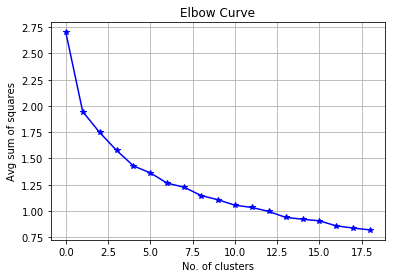

In [59]:
# Ploteamos el gráfico del codo de yambú
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(avgWithinSumSquare, 'b*-')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

Tomando como referencia el gráfico, buscaremos 6 clusters

In [60]:
### Clustering de los paises en bases a sus indicadores de desarrollo

In [ ]:
## Algoritmo: K-means, K-means ++

In [61]:
km = KMeans(6, init='k-means++', random_state = 3425) 
km.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3425, tol=0.0001, verbose=0)

In [62]:
df['countrySegment'] = km.predict(hpc)
df.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,3
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,0
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,5
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,1


In [63]:
df.groupby('countrySegment').contraception.count()

countrySegment
0    25
1    15
2    24
3    11
4    11
5    11
Name: contraception, dtype: int64

In [64]:
km = [KMeans(6, init='k-means++', random_state = rs) for rs in range(1,10)]
km

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=1, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=2, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=3, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=4, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=5, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [65]:
km[8]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=9, tol=0.0001, verbose=0)

In [66]:
km[2]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [67]:
[km[clu].fit(hpc) for clu in range(0,9)]

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=1, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=2, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=3, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=4, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=5, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

Añadimos la variable cluster por cada cluster calculado

In [68]:
df['countrySegment1'] = km[0].predict(hpc)
df['countrySegment2'] = km[1].predict(hpc)
df['countrySegment3'] = km[2].predict(hpc)
df['countrySegment4'] = km[3].predict(hpc)
df['countrySegment5'] = km[4].predict(hpc)
df['countrySegment6'] = km[5].predict(hpc)
df['countrySegment7'] = km[6].predict(hpc)
df['countrySegment8'] = km[7].predict(hpc)
df['countrySegment9'] = km[8].predict(hpc)
df.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment,countrySegment1,countrySegment2,countrySegment3,countrySegment4,countrySegment5,countrySegment6,countrySegment7,countrySegment8,countrySegment9
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,3,3,5,2,2,5,3,2,2,1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,0,5,3,4,5,2,0,0,4,5
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,5,2,2,0,4,3,5,3,0,2
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2,1,0,5,0,0,2,4,3,3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,1,4,1,1,1,1,1,1,1,0


In [69]:
df.groupby('countrySegment').contraception.count()

countrySegment
0    25
1    15
2    24
3    11
4    11
5    11
Name: contraception, dtype: int64

In [70]:
df.groupby('countrySegment1').contraception.count()

countrySegment1
0     9
1    30
2    12
3    12
4    15
5    19
Name: contraception, dtype: int64

In [71]:
df.groupby('countrySegment2').contraception.count()

countrySegment2
0    27
1    15
2    11
3    23
4    10
5    11
Name: contraception, dtype: int64

In [72]:
df.groupby('countrySegment3').contraception.count()

countrySegment3
0    11
1    16
2    12
3     9
4    22
5    27
Name: contraception, dtype: int64

In [73]:
df.groupby('countrySegment').contraception.count()

countrySegment
0    25
1    15
2    24
3    11
4    11
5    11
Name: contraception, dtype: int64

Etiquetamos los clusters obtenidos

In [74]:
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3',
    4:'Cluster4',
    5:'Cluster5'
}

df.countrySegment = df.countrySegment.map(clust_map)
df[:10]

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment,countrySegment1,countrySegment2,countrySegment3,countrySegment4,countrySegment5,countrySegment6,countrySegment7,countrySegment8,countrySegment9
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster3,3,5,2,2,5,3,2,2,1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster0,5,3,4,5,2,0,0,4,5
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster5,2,2,0,4,3,5,3,0,2
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster2,1,0,5,0,0,2,4,3,3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster1,4,1,1,1,1,1,1,1,0
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster0,2,3,4,5,2,0,0,4,5
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster0,5,3,4,5,2,0,0,4,5
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster2,1,0,5,0,0,2,4,3,3
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster1,4,1,1,1,1,1,1,1,0
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster4,0,4,3,3,4,3,5,5,4


Analizamos el PBI vs mortalidad infantil en cada cluster

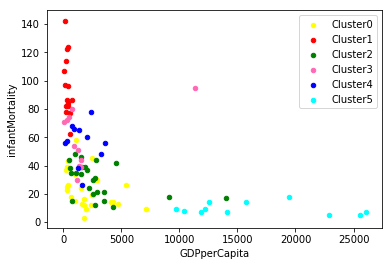

In [75]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink',
    'Cluster4':'blue',
    'Cluster5':'aqua'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Cuando el PBI es bajo la mortalidad infantil es alta.

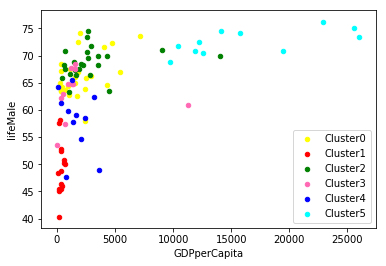

In [76]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeMale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

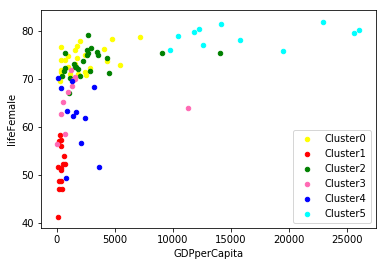

In [77]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeFemale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

In [78]:
km[0].labels_

array([3, 5, 2, 1, 4, 2, 5, 1, 4, 0, 0, 1, 4, 4, 4, 1, 1, 1, 5, 1, 1, 1,
       1, 3, 1, 5, 4, 1, 4, 5, 3, 4, 4, 1, 2, 5, 3, 1, 3, 3, 4, 1, 3, 5,
       2, 2, 5, 5, 5, 4, 1, 0, 1, 1, 5, 3, 0, 0, 4, 2, 3, 4, 3, 1, 1, 5,
       1, 2, 2, 1, 2, 5, 5, 1, 4, 2, 1, 2, 1, 0, 0, 5, 1, 4, 1, 1, 3, 1,
       5, 5, 2, 5, 0, 1, 5, 3, 0])

In [79]:
hpc[2]

array([-2.51605611, -0.76838707, -1.53678834,  0.93469974])

In [80]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[0].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.2899176009586157

In [81]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[1].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.2924113484401996

In [82]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[2].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.2897719646231664

In [83]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[3].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.2920577364986253

In [84]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

#kmeans_model = KMeans(n_clusters=3, randomkm[0]_state=1).fit(X)
labels = km[4].labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.2808399822160403

In [85]:
df.head()

,tfr,contraception,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale,countrySegment,countrySegment1,countrySegment2,countrySegment3,countrySegment4,countrySegment5,countrySegment6,countrySegment7,countrySegment8,countrySegment9
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,Cluster3,3,5,2,2,5,3,2,2,1
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,Cluster0,5,3,4,5,2,0,0,4,5
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,Cluster5,2,2,0,4,3,5,3,0,2
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,Cluster2,1,0,5,0,0,2,4,3,3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,Cluster1,4,1,1,1,1,1,1,1,0


In [86]:
df.groupby('countrySegment').contraception.mean()

countrySegment
Cluster0    49.480000
Cluster1    15.666667
Cluster2    57.416667
Cluster3    33.454545
Cluster4    29.545455
Cluster5    62.545455
Name: contraception, dtype: float64

In [87]:
df.groupby('countrySegment').lifeMale.mean()

countrySegment
Cluster0    66.404000
Cluster1    49.193333
Cluster2    68.670833
Cluster3    63.163636
Cluster4    58.136364
Cluster5    72.600000
Name: lifeMale, dtype: float64

In [88]:
df.groupby('countrySegment').GDPperCapita.mean()

countrySegment
Cluster0     2096.360000
Cluster1      348.466667
Cluster2     2942.833333
Cluster3     1898.000000
Cluster4     1617.545455
Cluster5    16419.090909
Name: GDPperCapita, dtype: float64

In [89]:
df.groupby('countrySegment').economicActivityMale.mean()

countrySegment
Cluster0    72.732000
Cluster1    83.193333
Cluster2    82.095833
Cluster3    77.536364
Cluster4    75.645455
Cluster5    73.136364
Name: economicActivityMale, dtype: float64

In [96]:
### Test de grupos

In [90]:
country_ecoActMale=df[['countrySegment','economicActivityMale']]
country_ecoActMale.head()

,countrySegment,economicActivityMale
2,Cluster3,76.4
8,Cluster0,65.0
12,Cluster5,81.2
13,Cluster2,88.2
14,Cluster1,88.8


In [91]:
cluster0_ecoActMale=country_ecoActMale[country_ecoActMale['countrySegment']=='Cluster0']
cluster1_ecoActMale=country_ecoActMale[country_ecoActMale['countrySegment']=='Cluster1']
cluster2_ecoActMale=country_ecoActMale[country_ecoActMale['countrySegment']=='Cluster2']
cluster3_ecoActMale=country_ecoActMale[country_ecoActMale['countrySegment']=='Cluster3']
cluster4_ecoActMale=country_ecoActMale[country_ecoActMale['countrySegment']=='Cluster4']
cluster5_ecoActMale=country_ecoActMale[country_ecoActMale['countrySegment']=='Cluster5']

In [92]:
c0_ecoActMale=cluster0_ecoActMale.iloc[:,1].values
c1_ecoActMale=cluster1_ecoActMale.iloc[:,1].values
c2_ecoActMale=cluster2_ecoActMale.iloc[:,1].values
c3_ecoActMale=cluster3_ecoActMale.iloc[:,1].values
c4_ecoActMale=cluster4_ecoActMale.iloc[:,1].values
c5_ecoActMale=cluster5_ecoActMale.iloc[:,1].values

In [93]:
from scipy import stats

In [94]:
stats.f_oneway(c0_ecoActMale,c1_ecoActMale,c2_ecoActMale,c3_ecoActMale,c4_ecoActMale,c5_ecoActMale)

F_onewayResult(statistic=10.947821706162495, pvalue=2.8829735708450468e-08)

!! FIN